In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

In [38]:
df = pd.read_csv("/content/cosmetics.csv")

In [39]:
df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


In [40]:
X = df[['Oily', 'Sensitive']]
y = df['Label']

In [41]:
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [42]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=30)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test , y_pred)
conf_matrix = confusion_matrix(y_test , y_pred)
classification_rep = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 25.76%
Confusion Matrix:
[[28  0 20  0  0  5]
 [22  0 21  0  0  7]
 [15  0 30  2  0  5]
 [20  0 25  6  0  7]
 [17  0 11  2  0  3]
 [16  0 21  0  0 12]]
Classification Report:
              precision    recall  f1-score   support

    Cleanser       0.24      0.53      0.33        53
   Eye cream       0.00      0.00      0.00        50
   Face Mask       0.23      0.58      0.33        52
 Moisturizer       0.60      0.10      0.18        58
 Sun protect       0.00      0.00      0.00        33
   Treatment       0.31      0.24      0.27        49

    accuracy                           0.26       295
   macro avg       0.23      0.24      0.19       295
weighted avg       0.25      0.26      0.20       295



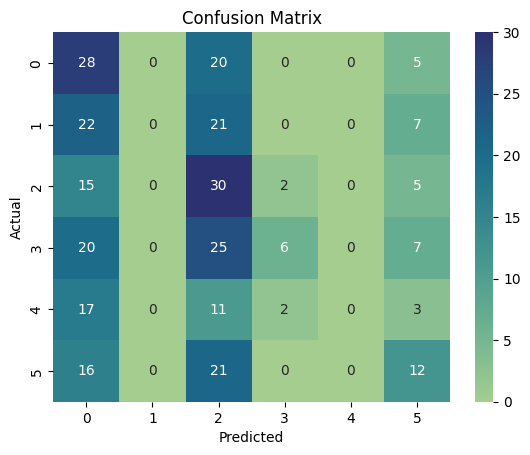

In [48]:
sns.heatmap(conf_matrix, annot=True, cmap="crest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
from sklearn.model_selection import cross_val_score, KFold

features = ['Price', 'Rank', 'Combination', 'Dry', 'Normal', 'Oily']
X = df[features]
y = df['Sensitive']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf)

average_accuracy = scores.mean()
print(f'Average model accuracy across all folds: {average_accuracy:.2f}')


Average model accuracy across all folds: 0.85
